# Kmeans Algorithm, contributed by team member Sneha Das

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from geopy.geocoders import Nominatim

import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
df = pd.read_excel('C:\\Users\\Lenovo\\Documents\\locations.xlsx')
df

,location,Experience,Rank,GO
0,Srinagar,10,9,NO
1,Goa,12,4,NO
2,Pune,4,6,NO
3,Bengaluru,4,4,NO
4,Ahemdabad,21,8,YES
...,...,...,...,...
494,Kanpur,8,5,NO
495,Agra,7,5,NO
496,Gwalior,19,8,YES
497,Kochi,12,9,YES


In [23]:
index_names = df[ df['location'] == 'Ahemdabad' ].index
df.drop(index_names, inplace = True)
  
df

,location,Experience,Rank,GO
0,Srinagar,10,9,NO
1,Goa,12,4,NO
2,Pune,4,6,NO
3,Bengaluru,4,4,NO
5,Bhilai,14,5,NO
...,...,...,...,...
494,Kanpur,8,5,NO
495,Agra,7,5,NO
496,Gwalior,19,8,YES
497,Kochi,12,9,YES


In [24]:
country='India'
city_names= df['location']
 
longitude1=[]
latitude1=[]
geolocator = Nominatim(user_agent="Trips")

for c in city_names.values:
  location = geolocator.geocode(c+','+ country)
  print(location)
  latitude1.append(location.latitude)
  longitude1.append(location.longitude)

Srinagar, Srinagar (South), Jammu and Kashmir, 190008, India
Goa, India
Pune City, Maharashtra, India
Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
Bhilai, Durg Tahsil, Durg, Chhattisgarh, 490023, India
Lucknow, Sadar, Lucknow, Uttar Pradesh, 226019, India
Varanasi, Sadar, Varanasi, Uttar Pradesh, 221001, India
Jamshedpur, Golmuri-Cum-Jugsalai, Purbi Singhbhum, Jharkhand, 831001, India
Agartala, Mohanpur, West Tripura, Tripura, 799001, India
Nashik, Maharashtra, India
Ludhiana, Ludhiana (West) Tahsil, Ludhiana, Punjab, 141008, India
Meerut, Uttar Pradesh, India
Patna, Patna Rural, Patna District, Bihar, 800001, India
Kanpur, Kanpur Nagar, Uttar Pradesh, India
Agra, Uttar Pradesh, 280001, India
Gwalior, Gwalior Tahsil, Gwalior, Madhya Pradesh, 474001, India
Kochi, Ernakulam district, Kerala, 682005, India
Kannur, Kannur district, Kerala, India
Chennai, Chennai District, Tamil Nadu, 600001, India
Madurai, Madurai South, Madurai District, Tamil Nadu, India
Surat, Gujarat, 

In [25]:
df

,location,Experience,Rank,GO
0,Srinagar,10,9,NO
1,Goa,12,4,NO
2,Pune,4,6,NO
3,Bengaluru,4,4,NO
5,Bhilai,14,5,NO
...,...,...,...,...
494,Kanpur,8,5,NO
495,Agra,7,5,NO
496,Gwalior,19,8,YES
497,Kochi,12,9,YES


In [26]:
df.insert(4,"Latitude2",latitude1)
df.insert(5,"Longitude2",longitude1)

In [27]:
df

,location,Experience,Rank,GO,Latitude2,Longitude2
0,Srinagar,10,9,NO,34.074744,74.820444
1,Goa,12,4,NO,15.300454,74.085513
2,Pune,4,6,NO,18.521428,73.854454
3,Bengaluru,4,4,NO,12.976794,77.590082
5,Bhilai,14,5,NO,21.212068,81.373285
...,...,...,...,...,...,...
494,Kanpur,8,5,NO,26.460914,80.321759
495,Agra,7,5,NO,27.175255,78.009816
496,Gwalior,19,8,YES,26.203725,78.157363
497,Kochi,12,9,YES,9.931308,76.267414


In [28]:
l2=df.iloc[:,-1:-3:-1]
l2 

,Longitude2,Latitude2
0,74.820444,34.074744
1,74.085513,15.300454
2,73.854454,18.521428
3,77.590082,12.976794
5,81.373285,21.212068
...,...,...
494,80.321759,26.460914
495,78.009816,27.175255
496,78.157363,26.203725
497,76.267414,9.931308


In [29]:
kmeans= KMeans(5)
kmeans.fit(l2)

identified_clusters = kmeans.fit_predict(l2)
identified_clusters = list(identified_clusters)
identified_clusters

[3,
 4,
 4,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 4,
 2,
 3,
 3,
 0,
 0,
 3,
 4,
 4,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 4,
 2,
 3,
 3,
 0,
 0,
 3,
 4,
 4,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 4,
 2,
 3,
 3,
 0,
 0,
 3,
 4,
 4,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 4,
 2,
 3,
 3,
 0,
 0,
 3,
 4,
 4,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 4,
 2,
 3,
 3,
 0,
 0,
 3,
 4,
 4,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 4,
 2,
 3,
 3,
 0,
 0,
 3,
 4,
 4,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 4,
 2,
 3,
 3,
 0,
 0,
 3,
 4,
 4,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 4,
 2,
 3,
 3,
 0,
 0,
 3,
 4,
 4,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 0,


In [30]:
df['loc_clusters'] = identified_clusters
df

,location,Experience,Rank,GO,Latitude2,Longitude2,loc_clusters
0,Srinagar,10,9,NO,34.074744,74.820444,3
1,Goa,12,4,NO,15.300454,74.085513,4
2,Pune,4,6,NO,18.521428,73.854454,4
3,Bengaluru,4,4,NO,12.976794,77.590082,0
5,Bhilai,14,5,NO,21.212068,81.373285,1
...,...,...,...,...,...,...,...
494,Kanpur,8,5,NO,26.460914,80.321759,1
495,Agra,7,5,NO,27.175255,78.009816,1
496,Gwalior,19,8,YES,26.203725,78.157363,1
497,Kochi,12,9,YES,9.931308,76.267414,0


# Decision Tree, contributed by team member Dharti Patel

In [53]:
import pandas as pd
l=('C:\\Users\\Lenovo\\Documents\\locations.xlsx')
data= pd.read_excel(l)
data

,location,Experience,Rank,GO
0,Srinagar,10,9,NO
1,Goa,12,4,NO
2,Pune,4,6,NO
3,Bengaluru,4,4,NO
4,Ahemdabad,21,8,YES
...,...,...,...,...
494,Kanpur,8,5,NO
495,Agra,7,5,NO
496,Gwalior,19,8,YES
497,Kochi,12,9,YES


In [52]:
input_city = input("Enter a city name: ")
cluster = df.loc[df['location'] == input_city, 'loc_clusters']
cluster = cluster.iloc[0]
cluster
cities = df.loc[df['loc_clusters'] == cluster, 'location']
cities
for c in range(len(cities)):
  if cities.iloc[c] == input_city:
    break
  else:
    print(cities.iloc[c])

Enter a city name: Ladakh
Srinagar
Ludhiana


In [54]:
import pandas
l=pandas.read_excel('C:\\Users\\Lenovo\\Documents\\locations.xlsx')
d = {'YES': 1, 'NO': 0}
l['GO'] = l['GO'].map(d)

print(l)

      location  Experience  Rank  GO
0     Srinagar          10     9   0
1          Goa          12     4   0
2         Pune           4     6   0
3    Bengaluru           4     4   0
4    Ahemdabad          21     8   1
..         ...         ...   ...  ..
494     Kanpur           8     5   0
495       Agra           7     5   0
496    Gwalior          19     8   1
497      Kochi          12     9   1
498     Kannur          11     8   0

[499 rows x 4 columns]


In [55]:
features = ['location', 'Experience', 'Rank', 'GO']
x=l[features]
y=l['GO']

print(x)
print(y)

      location  Experience  Rank  GO
0     Srinagar          10     9   0
1          Goa          12     4   0
2         Pune           4     6   0
3    Bengaluru           4     4   0
4    Ahemdabad          21     8   1
..         ...         ...   ...  ..
494     Kanpur           8     5   0
495       Agra           7     5   0
496    Gwalior          19     8   1
497      Kochi          12     9   1
498     Kannur          11     8   0

[499 rows x 4 columns]
0      0
1      0
2      0
3      0
4      1
      ..
494    0
495    0
496    1
497    1
498    0
Name: GO, Length: 499, dtype: int64


     Experience  Rank  GO
0            10     9   0
1            12     4   0
2             4     6   0
3             4     4   0
4            21     8   1
..          ...   ...  ..
494           8     5   0
495           7     5   0
496          19     8   1
497          12     9   1
498          11     8   0

[499 rows x 3 columns]
0      0
1      0
2      0
3      0
4      1
      ..
494    0
495    0
496    1
497    1
498    0
Name: GO, Length: 499, dtype: int64


[Text(167.4, 163.07999999999998, 'GO <= 0.5\ngini = 0.487\nsamples = 349\nvalue = [146, 203]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 146\nvalue = [146, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 203\nvalue = [0, 203]')]

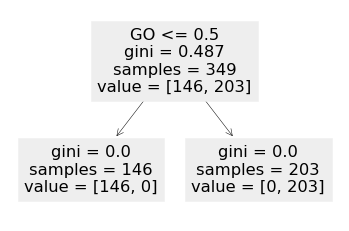

In [32]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

l=pandas.read_excel('C:\\Users\\Lenovo\\Documents\\locations.xlsx')
d = {'YES': 1, 'NO': 0}
l['GO'] = l['GO'].map(d)

features = ['Experience', 'Rank', 'GO']
x=l[features]
y=l['GO']

print(x)
print(y)

X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

dtree=DecisionTreeClassifier()
dtree=dtree.fit(X_train,Y_train)

tree.plot_tree(dtree, feature_names=features)

In [34]:
print(dtree.predict([[10,9,0]]))

print("[1] means 'GO'")
print("[0] means 'NO'")

[0]
[1] means 'GO'
[0] means 'NO'


In [35]:
prediction = dtree.predict(X_test.values)

In [36]:
Y_train

84     0
387    1
149    1
101    1
450    0
      ..
320    1
15     0
484    1
125    0
265    1
Name: GO, Length: 349, dtype: int64

In [37]:
prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(Y_test,prediction)*100

In [39]:
accuracy_dt

100.0

# Graphs depicting our Dataset

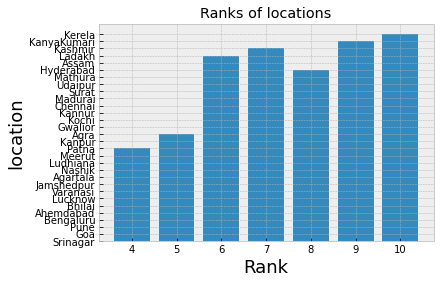

In [20]:
#Bar plot
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('bmh')
data=pd.read_excel('C:\\Users\\Lenovo\\Documents\\locations.xlsx')

y=data['location']
x=data['Rank']
plt.bar(x,y)
plt.title("Ranks of locations")
plt.xlabel("Rank",fontsize=18)
plt.ylabel("location",fontsize=18)
 
plt.show()

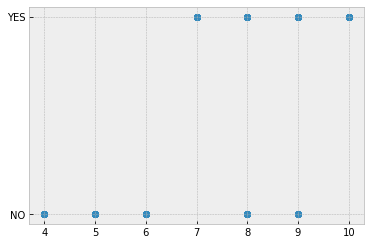

In [21]:
#Scatter Plot
x=data['Rank']
y=data['GO']
plt.scatter(x,y)
plt.show()

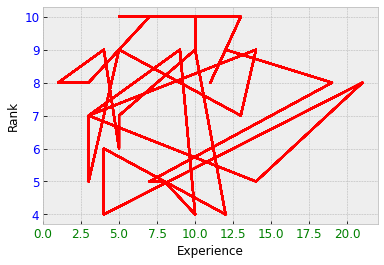

In [22]:
x=data['Experience']
y=data['Rank']

plt.plot(x,y,'r')
plt.xlabel('Experience')
plt.ylabel('Rank')
plt.tick_params(axis="x",labelsize=12,labelcolor="green")
plt.tick_params(axis="y",labelsize=12,labelcolor="blue")
plt.show()